In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# visuals
import matplotlib.pyplot as plt

#ssss
targ = 'SUSPECT_ARRESTED_FLAG'
Table1_target = ["SUSPECT_ARRESTED_FLAG", "STOP_WAS_INITIATED",
                 "OBSERVED_DURATION_MINUTES", "SUSPECTED_CRIME_DESCRIPTION",
                 "STOP_DURATION_MINUTES", "FIREARM_FLAG",
                 "SUSPECT_RACE_DESCRIPTION",
                 "DEMEANOR_OF_PERSON_STOPPED", "SUSPECT_BODY_BUILD_TYPE"]



Table1 = pd.read_excel("sqf2022.xlsx", usecols=Table1_target)

#replace (null) in fire arm flag with No, so it wouldn't cause problem if we want to remove 
# (null) that represent missing value
Table1['FIREARM_FLAG'] = Table1['FIREARM_FLAG'].replace('(null)', 'No')

n_unique = Table1['DEMEANOR_OF_PERSON_STOPPED'].nunique()
unique_values = Table1['DEMEANOR_OF_PERSON_STOPPED'].unique()
print(f'Number of unique values: {n_unique}')
print(f'Unique values: {unique_values}')


#Binarize
lb = LabelBinarizer()
Table1["SUSPECT_ARRESTED_FLAG"] = lb.fit_transform(Table1["SUSPECT_ARRESTED_FLAG"])
Table1["FIREARM_FLAG"] = lb.fit_transform(Table1["FIREARM_FLAG"])

#Bag-of-word Incomplete!
Table1["DEMEANOR_OF_PERSON_STOPPED"].fillna("Calm", inplace=True)
vectorizer = CountVectorizer()
BOW_trans = vectorizer.fit_transform(Table1["DEMEANOR_OF_PERSON_STOPPED"])
BOW_df = pd.DataFrame(BOW_trans.toarray(), columns=vectorizer.get_feature_names_out())

#Lable encodeing
Label_Encode_feature = ["SUSPECT_RACE_DESCRIPTION","SUSPECTED_CRIME_DESCRIPTION","STOP_WAS_INITIATED"]
Label_En = OneHotEncoder(handle_unknown="ignore")
Feature_Encoded = Label_En.fit_transform(Table1[Label_Encode_feature])
Label_df = pd.DataFrame(Feature_Encoded.toarray(), columns=Label_En.get_feature_names_out(Label_Encode_feature))
#Labeled_columns = Label_En.get_feature_names(Label_Encode_feature)

# join the one-hot encoded columns to the original dataframe
#Table1 = Table1.join(Label_df,BOW_df)
Table1 = pd.concat([Table1, Label_df], axis=1)

# drop the original categorical feature column
Table1 = Table1.drop(columns=Label_Encode_feature)
#Table1 = Table1.drop(columns="DEMEANOR_OF_PERSON_STOPPED")
# print the updated dataframe



# save the updated dataframe to a CSV file
Table1.to_csv('output.csv', index=False)

Number of unique values: 1685
Unique values: ['FLED ON FOOT' nan 'NERVOUS CHANGING DIRECTION FROM OFFICERS RUNNING' ...
 'IRRITATED CONFUSED' 'AGITATED AND THEN CALM' 'ANNOYED NON COMPLIANT']


2
[1 0]
0    10117
1     4985
Name: SUSPECT_ARRESTED_FLAG, dtype: int64


<Axes: >

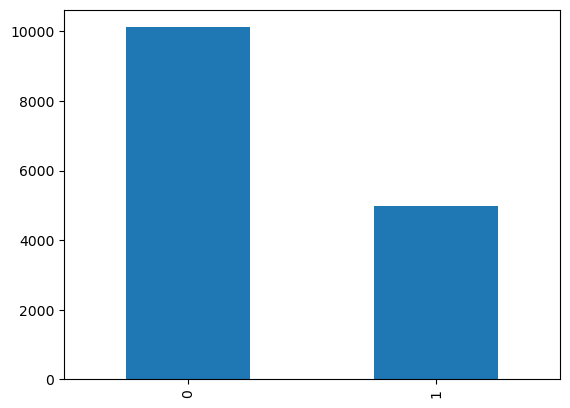

In [15]:
n_unique = Table1['SUSPECT_ARRESTED_FLAG'].nunique()
unique_values = Table1['SUSPECT_ARRESTED_FLAG'].unique()

value_counts = Table1['SUSPECT_ARRESTED_FLAG'].value_counts()
print(n_unique)
print(unique_values)
print(value_counts)

#print(Table1.head(20))

Table1['SUSPECT_ARRESTED_FLAG'].value_counts().plot(kind='bar')
#plt.show()



In [ ]:
# Data Clean


0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
16    0
17    0
18    0
19    0
Name: SUSPECT_ARRESTED_FLAG, dtype: int64


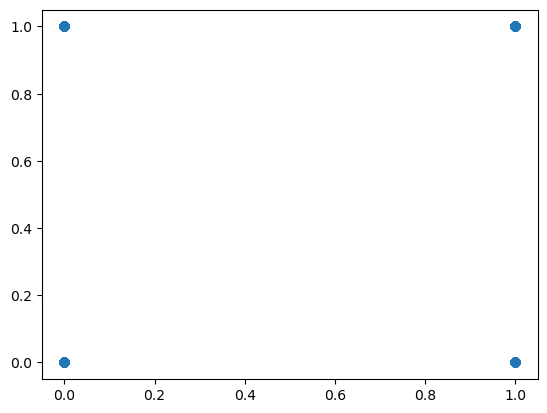

In [29]:
# Scatter plot of feature correlations with target 'SUSPECT_ARRESTED_FLAG'

# for feature in Table1_target:
print(Table1[targ].head(20))
plt.scatter(x=Table1['FIREARM_FLAG'],y=Table1[targ])

